# **Air Quality Monitor Representativeness in the Contiguous United States**

#### **Objective:** Determine whether state and local governments site air monitors in areas that capture data that are representative of actual air quality.

#### **Scope:**

#### **Sources:**

| Num. | Title | Description | Source Link |
| :--- | :------------------------------ | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | :--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1. | _daily\_88101\_2019.csv_ | Derived from the U.S. EPA Pre\-Generated Data Files webpage on 10/28/2025, this dataset contains the PM2.5 air monitor data for every day in the year 2019 for all monitors in the United States and its territories;                                                                                                    \-\- Data Dictionary: [https://www.epa.gov/aqs/aqs\-data\-dictionary](https://www.epa.gov/aqs/aqs-data-dictionary) | [https://aqs.epa.gov/aqsweb/airdata/download\_files.html\#Daily](https://aqs.epa.gov/aqsweb/airdata/download_files.html#Daily) \(see "Particulates" and "2019"\) |
| 2. | USHAP\_PM2.5\_D1K\_2019\_V1.zip | Derived from research out of the Universities of Maryland and Iowa on 11/03/2025, this dataset contains 1\-kilometer resolution PM2.5 estimates in the contiguous United States for every day in the year 2019. The dataset was generated from big data \(e.g., ground\-based measurements, satellite remote sensing products, atmospheric reanalysis, and model simulations\) using artificial intelligence. The researchers show their estimates align well with physical measurements, with 0.82 cross\-validated coefficients of determination. | Paper: [https://www.thelancet.com/journals/lanplh/article/PIIS2542\-5196\(23\)00235\-8/fulltext](https://www.thelancet.com/journals/lanplh/article/PIIS2542-5196(23)00235-8/fulltext) <br> <br>  Data: <br> https://zenodo.org/records/7884640 |



#### Methodology

1. AQS Data Cleaning
   1. Download AQS Dataset
   2. Load Libraries
   3. Load AQS Dataset
   4. Select Relevant AQS Dataset Variables
   5. Generate a Dataset of PM2.5 Monitors with Locations
2. Alternative PM2.5 Values Dataset
   1. 



### **AQS Data Cleaning**



#### AQS Data Cleaning Pseudocode

1. Load libraries I will likely need
2. Load AQS dataset: DF &lt;\- read.csv
3. Limited\_DF &lt;\- Select\(State.Code, County.Code, Site.Num, Latitude, Longitude, Address, [State.Name](http://State.Name), [County.Name](http://County.Name), [City.Name](http://City.Name)\)
4. Unique identifier \(AQS\_ID\) &lt;\- Leading\_Zeros\_If\_Needed\(State.Code \+ County.Code  \+ Site.Num\)
5. Filter to unique AQS\_ID w/ locations



#### Load Libraries



In [3]:
#Purpose of Cell Block: Load libraries I will likely need
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(readr))
suppressPackageStartupMessages(library(vroom))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(stringr))
suppressPackageStartupMessages(library(terra))

if (!require(dplyr)) install.packages("dplyr")
if (!require(dplyr)) install.packages("tidyr")
if (!require(readr)) install.packages("readr")
if (!require(vroom)) install.packages("vroom")
if (!require(ggplot2)) install.packages("ggplot2")
if (!require(stringr)) install.packages("stringr")
if (!require(stringr)) install.packages("terra")

library(dplyr)
library(tidyr)
library(readr)
library(vroom)
library(ggplot2)
library(stringr)
library(terra)

#### Load AQS Dataset



In [4]:
#Purpose of Cell Block: Get dataset
DF_aqs2019 <- read.csv("data/daily_88101_2019.csv")

In [5]:
#Purpose of Cell Block: Explore uploaded dataset

#head(DF_aqs2019)
dim(DF_aqs2019)
names(DF_aqs2019)
#glimpse(DF_aqs2019)
#summary(DF_aqs2019)

#Assessment: The dataset is too large. Need to select only the variables of interest. It also appears the AQS ID variables dropped their leading zeros. I will need to fix that issue for a proper unique identifier 

[1] 654337     29

[1] "State.Code"          "County.Code"         "Site.Num"           
 [4] "Parameter.Code"      "POC"                 "Latitude"           
 [7] "Longitude"           "Datum"               "Parameter.Name"     
[10] "Sample.Duration"     "Pollutant.Standard"  "Date.Local"         
[13] "Units.of.Measure"    "Event.Type"          "Observation.Count"  
[16] "Observation.Percent" "Arithmetic.Mean"     "X1st.Max.Value"     
[19] "X1st.Max.Hour"       "AQI"                 "Method.Code"        
[22] "Method.Name"         "Local.Site.Name"     "Address"            
[25] "State.Name"          "County.Name"         "City.Name"          
[28] "CBSA.Name"           "Date.of.Last.Change"

#### Select Relevant AQS Dataset Variables



In [9]:
#Purpose of Cell Block: Pulling relevant variables for a smaller dataset

DF_aqs2019_loc <- DF_aqs2019 %>% 
    select('State.Code':'Site.Num','Latitude','Longitude','Address':'City.Name', 'Date.Local') %>% 
    rename('State_Code' = 'State.Code', 'County_Code' = 'County.Code','State' = 'State.Name', 'Site_Code' = 'Site.Num', 'County' = 'County.Name', 'City' = 'City.Name', 'Date' = 'Date.Local') %>%
    mutate(Date = as.Date(Date)) #converting date value from character to date

#Confirming new dataset 
head(DF_aqs2019_loc)
dim(DF_aqs2019_loc)
names(DF_aqs2019_loc)
glimpse(DF_aqs2019_loc)
summary(DF_aqs2019_loc)

,State_Code,County_Code,Site_Code,Latitude,Longitude,Address,State,County,City,Date
,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<date>
1,1,3,10,30.49748,-87.88026,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,2019-01-03
2,1,3,10,30.49748,-87.88026,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,2019-01-06
3,1,3,10,30.49748,-87.88026,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,2019-01-09
4,1,3,10,30.49748,-87.88026,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,2019-01-12
5,1,3,10,30.49748,-87.88026,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,2019-01-15
6,1,3,10,30.49748,-87.88026,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,2019-01-24


[1] 654337     10

[1] "State_Code"  "County_Code" "Site_Code"   "Latitude"    "Longitude"  
 [6] "Address"     "State"       "County"      "City"        "Date"

Rows: 654,337
Columns: 10
$ State_Code  <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ County_Code <int> 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3…
$ Site_Code   <int> 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10…
$ Latitude    <dbl> 30.49748, 30.49748, 30.49748, 30.49748, 30.49748, 30.49748…
$ Longitude   <dbl> -87.88026, -87.88026, -87.88026, -87.88026, -87.88026, -87…
$ Address     <chr> "FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE,  ALABAMA"…
$ State       <chr> "Alabama", "Alabama", "Alabama", "Alabama", "Alabama", "Al…
$ County      <chr> "Baldwin", "Baldwin", "Baldwin", "Baldwin", "Baldwin", "Ba…
$ City        <chr> "Fairhope", "Fairhope", "Fairhope", "Fairhope", "Fairhope"…
$ Date        <date> 2019-01-03, 2019-01-06, 2019-01-09, 2019-01-12, 2019-01-1…


   State_Code     County_Code       Site_Code       Latitude    
 Min.   : 1.00   Min.   :  1.00   Min.   :   1   Min.   :17.71  
 1st Qu.:13.00   1st Qu.: 19.00   1st Qu.:   7   1st Qu.:35.32  
 Median :29.00   Median : 51.00   Median :  24   Median :39.41  
 Mean   :28.54   Mean   : 73.56   Mean   : 691   Mean   :38.52  
 3rd Qu.:42.00   3rd Qu.:103.00   3rd Qu.:1001   3rd Qu.:41.77  
 Max.   :78.00   Max.   :810.00   Max.   :9997   Max.   :64.85  
   Longitude         Address             State              County         
 Min.   :-159.37   Length:654337      Length:654337      Length:654337     
 1st Qu.:-109.43   Class :character   Class :character   Class :character  
 Median : -89.87   Mode  :character   Mode  :character   Mode  :character  
 Mean   : -94.93                                                           
 3rd Qu.: -80.87                                                           
 Max.   : -64.78                                                           
     City    

##### **Site ID Format**

**State Code**

A two\-digit FIPS code that identifies one of the 50 US states.  May also indicate a Tribal Area \(TT\) or other country such as Canada \(CC\) or Mexico \(80\).

**County Code**

A three\-digit FIPS code that identifies a county or the equivalent geo\-political entity, such as a parish or independent city.

**Tribal Code**

Only visible in Tribal Mode.  A two\-digit FIPS code that identifies one of the federally recognized Native American tribal agencies when the Tribal Ind is set to "TT".  If your Screening Group also has non\-tribal data, this column will contain the County Code.

**Site Number**

A four\-digit number used to uniquely identify a site within a county.  Defined and maintained by the states or Tribal agencies.  When this is a Tribal site care must be taken to ensure that the site ID is unique not only in the Tribal Area but also in all the counties that the tribal area includes or crosses.

Source: [https://www.epa.gov/aqs/site\-id\-format](https://www.epa.gov/aqs/site-id-format) 


In [18]:
#Purpose of Cell Block: I will need a single identifier for each monitor, meaning I need to combine the identifier variables. The variables need to match the format shown in the markdown cell block above, meaning I will first need to add leading zeros to the data if needed

DF_aqs2019_loc2 <- DF_aqs2019_loc %>%
    mutate('State_Code_Fix' = str_pad(State_Code, width = 2, pad = 0)) %>% #pad leading zero so state code always 2 char
    mutate('County_Code_Fix' = str_pad(County_Code, width = 3, pad = 0)) %>% #pad leading zero so county code always 3 char
    mutate('Site_Num_Fix' = str_pad(Site_Code, width = 4, pad = 0)) %>% #pad leading zero so site num always 4 char
    select(-('State_Code':'Site_Code')) %>%  #drop old codes
    unite(
        col = 'AQS_Site_ID','State_Code_Fix', 
        'County_Code_Fix', 
        'Site_Num_Fix', 
        sep = "", 
        remove = TRUE
    )

head(DF_aqs2019_loc2)

#QA check to make sure Site ID len = 9
DF_LenCheck <- DF_aqs2019_loc2 %>%
    mutate(LenCheck = nchar(AQS_Site_ID)) %>% #add column to count the number of characters in AQS_Site_ID
    filter(!LenCheck %in% c(9)) #filter to only show rows with different than 9 characters
    
head(DF_LenCheck)
#Conclusion: No AQS_Site_ID values contain more or less than 9 characters

,Latitude,Longitude,Address,State,County,City,Date,AQS_Site_ID
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
1,30.49748,-87.88026,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,2019-01-03,010030010
2,30.49748,-87.88026,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,2019-01-06,010030010
3,30.49748,-87.88026,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,2019-01-09,010030010
4,30.49748,-87.88026,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,2019-01-12,010030010
5,30.49748,-87.88026,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,2019-01-15,010030010
6,30.49748,-87.88026,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,2019-01-24,010030010


Latitude,Longitude,Address,State,County,City,Date,AQS_Site_ID,LenCheck
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<int>


#### Generate a Dataset of PM2.5 Monitors with Locations



In [19]:
#Purpose of Cell Block: Reduce the dataset to only unique AQS_Site_ID (dataset was originally "daily observations")
DF_aqs2019_loc3 <- DF_aqs2019_loc2 %>%
    distinct()  %>%
    relocate(AQS_Site_ID, Latitude, Longitude, Address, State, County, City) #cleaning up dataframe column order

#Check total number of monitors
Monitors2019 <- DF_aqs2019_loc3 %>%
    summarise(total_sites = n_distinct(AQS_Site_ID))

print(paste0(Monitors2019$total_sites, " PM2.5 monitors operating in 2019"))
head(DF_aqs2019_loc3)
#Conclusion: 996 PM2.5 monitors operated in the United States and its territories in 2019

[1] "996 PM2.5 monitors operating in 2019"


,AQS_Site_ID,Latitude,Longitude,Address,State,County,City,Date
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<date>
1,010030010,30.49748,-87.88026,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,2019-01-03
2,010030010,30.49748,-87.88026,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,2019-01-06
3,010030010,30.49748,-87.88026,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,2019-01-09
4,010030010,30.49748,-87.88026,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,2019-01-12
5,010030010,30.49748,-87.88026,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,2019-01-15
6,010030010,30.49748,-87.88026,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,2019-01-24


### **Alternative PM2.5 Dataset**



#### Alternative PM2.5 Data Cleaning Pseudocode

1. Load the 364 Alternative PM2.5 datasets: DF &lt;\- read.netcdf
2. Append 364 datasets into a single dataframe
3. Note we need to add our values to the air monitor dataset so we can assess how well they relate to physical air measurements. we take this step prior to using the data to identify hotspots for each county



In [60]:
#Purpose of Cell Block: Locate and ready Alt. PM2.5 datasets 

altPM25_files <- list.files("data", pattern = "\\.nc$", full.names = TRUE) #identify the number of alt. PM2.5 files in data folder
n_distinct(altPM25_files) #count alt. PM2.5 files


#Identify the relevant variable in the alternative dataset
altpm25_var <- names(rast(altPM25_files[1]))
altpm25_var

[1] 364

[1] "PM2.5"

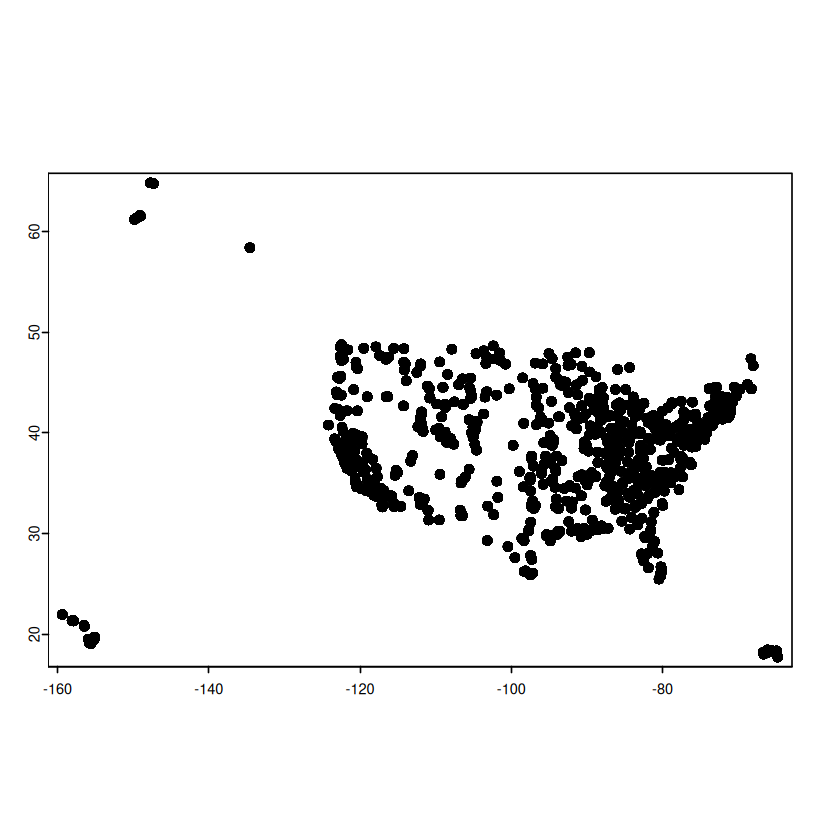

In [61]:
#Purpose of Cell Block: Plot monitor locations

monitor_table  <- DF_aqs2019_loc3 %>% 
    select(AQS_Site_ID, Longitude, Latitude)

monitor_points <- vect(monitor_table, geom = c("Longitude", "Latitude"), crs = "EPSG:4326")
plot(monitor_points)

In [68]:
#Purpose of Cell Block: Grab Alt. PM2.5 value for each monitor location on each day

#Creating a function that converts the dates in the filenames into a string, which we can use to add our alternative PM2.5 variables to our daily monitor data
AltPM25_filename_date <- function(file_path) {
    file_name <- basename(file_path) #extract filename
    sDate <- regmatches(file_name, regexpr("[0-9]{8}", file_name)) #extract filenames' date
    as.Date(sDate, format = "%Y%m%d") #convert to date (storing it in sDate, which is a string)
}

# #Create container for daily results
# daily_results <- vector("list", length(altPM25_files))

#For each day of alternative data, grab the alternative date and use it to add alternative data to the associated day for each monitor
for (AltPM25_file in altPM25_files) {
    AltDate <- AltPM25_filename_date(AltPM25_file)
    
    #Filter to only monitors on the date associated with our alternative PM2.5 dataset
    monitors_on_date <- DF_aqs2019_loc3 %>%
        filter(Date == AltDate)
    
    #Plot our filtered monitors 
    points_on_date <- vect(monitors_on_date %>% 
        select(AQS_Site_ID, Longitude, Latitude),
        geom = c("Longitude", "Latitude"),
        crs  = "EPSG:4326"
    )

    #plot(points_on_date, main = paste0("Monitor locations on ", AltDate))
    
}


ERROR: [1m[33mError[39m in `n_distinct()`:[22m
[33m![39m `..1` must be a vector, not a <SpatVector> object.
